# Week 6 Seminar Answers

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd

## Question 1

In [9]:
data = yf.download("AMZN TSLA", start="2020-01-01", end="2020-10-31")

[*********************100%***********************]  2 of 2 completed


In [10]:
data.tail()

Adj Close                    Close                     High  \
                   AMZN        TSLA         AMZN        TSLA         AMZN   
Date                                                                        
2020-10-15  3338.649902  448.880005  3338.649902  448.880005  3355.879883   
2020-10-16  3272.709961  439.670013  3272.709961  439.670013  3399.659912   
2020-10-19  3207.209961  430.829987  3207.209961  430.829987  3329.000000   
2020-10-20  3217.010010  421.940002  3217.010010  421.940002  3266.000000   
2020-10-21  3184.939941  422.640015  3184.939941  422.640015  3233.875000   

                               Low                     Open              \
                  TSLA        AMZN        TSLA         AMZN        TSLA   
Date                                                                      
2020-10-15  456.570007  3280.00000  442.500000  3292.010010  450.309998   
2020-10-16  455.950012  3160.00000  438.850006  3363.229980  454.440002   
2020-10-19  447.000000  3192.73999  428.869995  3299.610107  446.239990   
2020-10-20  431.750000  3192.01001  419.049988  3222.280029  431.750000   
2020-10-21  432.950012  3160.00000  421.250000  3212.500000  422.700012   

             Volume            
               AMZN      TSLA  
Date                           
2020-10-15  5223400  35672400  
2020-10-16  6474400  32775900  
2020-10-19  5223600  36287800  
2020-10-20  4495700  31444700  
2020-10-21  4331183  25998147

## Question 2

In [12]:
ADJ =  data['Adj Close']
ADJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2020-01-02 to 2020-10-21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    204 non-null    float64
 1   TSLA    204 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002165A7E9E80>,
      dtype=object)

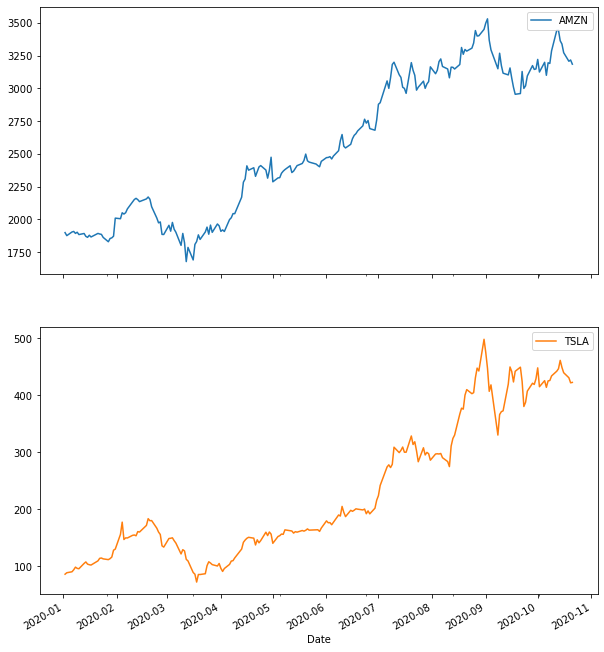

In [13]:
ADJ.plot(figsize=(10, 12), subplots=True)

## Question 3

In [14]:
ADJ.describe().round(2)

,AMZN,TSLA
count,204.00,204.00
mean,2562.67,230.92
std,544.06,121.13
min,1676.61,72.24
25%,2007.59,141.02
50%,2465.82,176.86
75%,3112.97,314.87
max,3531.45,498.32


In [15]:
rets = np.log(ADJ / ADJ.shift(1))
rets.head().round(4)

,AMZN,TSLA
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.0122,0.0292
2020-01-06,0.0148,0.0191
2020-01-07,0.0021,0.0381
2020-01-08,-0.0078,0.0480


## Question 4

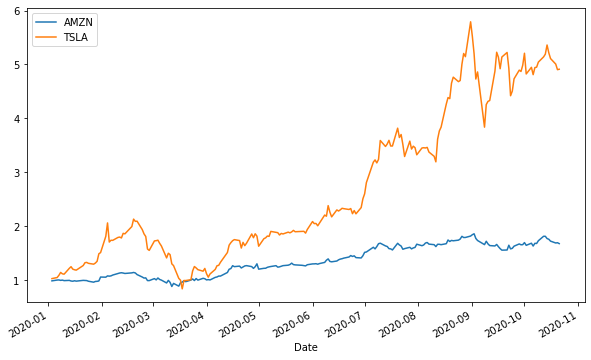

In [16]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

## Question 5

In [26]:
sym = 'AMZN'
AMZN_data = pd.DataFrame(ADJ[sym]).dropna()
AMZN_data.tail()

,AMZN
Date,
2020-10-15,3338.649902
2020-10-16,3272.709961
2020-10-19,3207.209961
2020-10-20,3217.010010
2020-10-21,3184.939941


In [27]:
AMZN_data['SMA1'] = ADJ[sym].rolling(window=20).mean()
AMZN_data['SMA2'] = ADJ[sym].rolling(window=60).mean()
AMZN_data[[sym, 'SMA1', 'SMA2']].tail()

,AMZN,SMA1,SMA2
Date,,,
2020-10-15,3338.649902,3176.701965,3196.972990
2020-10-16,3272.709961,3192.591968,3201.742322
2020-10-19,3207.209961,3204.928967,3205.047323
2020-10-20,3217.010010,3209.329968,3207.743990
2020-10-21,3184.939941,3218.583960,3210.820821


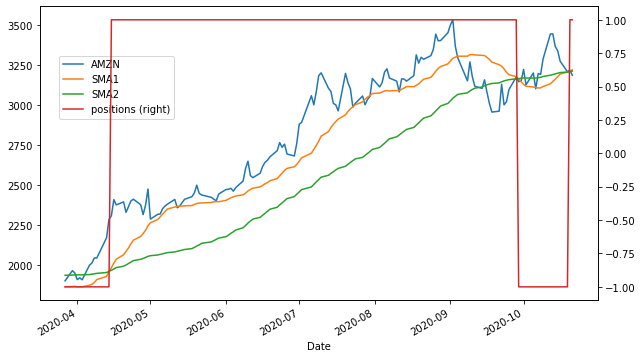

In [28]:
AMZN_data.dropna(inplace=True)
AMZN_data['positions'] = np.where(AMZN_data['SMA1'] > AMZN_data['SMA2'],1,-1)
ax = AMZN_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

## Question 6

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002165B6B7E50>,
      dtype=object)

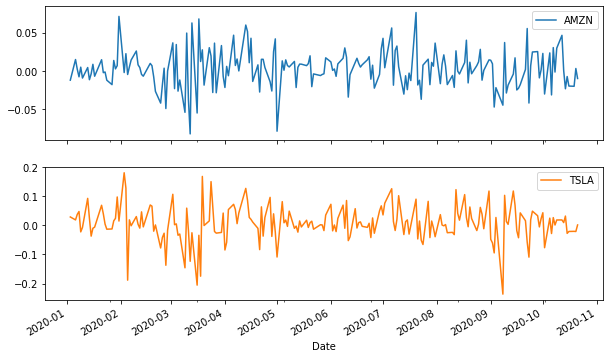

In [29]:
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002165C75FCA0>,
      dtype=object)

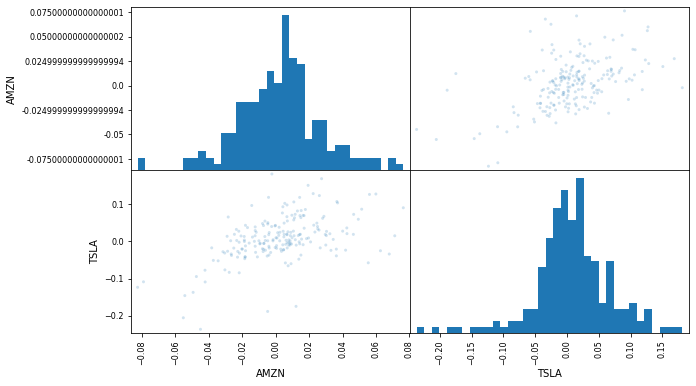

In [30]:
pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

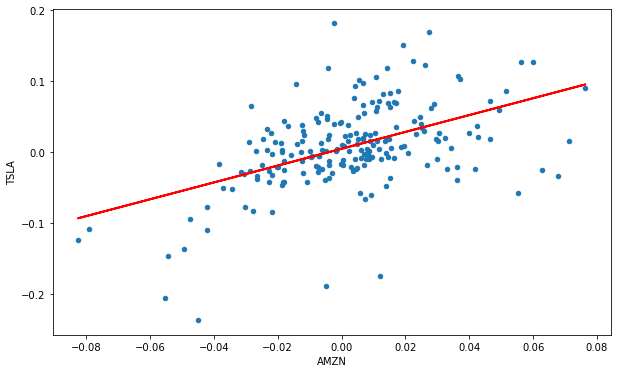

In [31]:
reg = np.polyfit(rets['AMZN'], rets['TSLA'], deg=1)
ax = rets.plot(kind='scatter', x='AMZN', y='TSLA', figsize=(10, 6))
ax.plot(rets['AMZN'], np.polyval(reg, rets['AMZN']), 'r', lw=2);

In [32]:
rets.corr()

,AMZN,TSLA
AMZN,1.00000,0.49472
TSLA,0.49472,1.00000


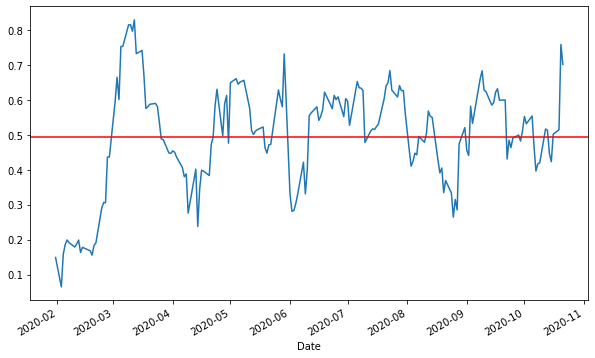

In [33]:
ax = rets['AMZN'].rolling(window=20).corr(rets['TSLA']).plot(figsize=(10, 6)) 
ax.axhline(rets.corr().iloc[0, 1], c='r');